In [ ]:
# Yijia Lu
# 1961366
# 4/18/2023

https://github.com/TClyj/EE-machine-learning-project.git

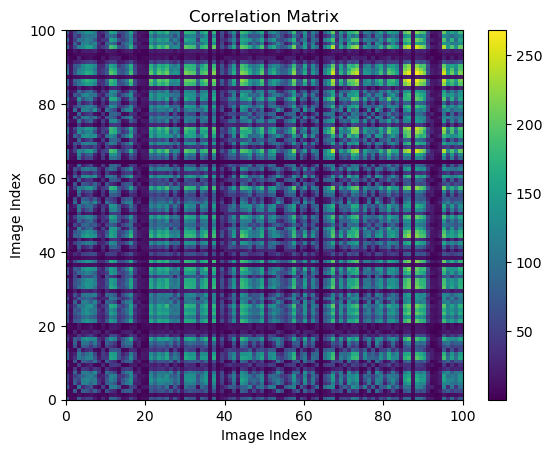

In [46]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load the file
results = loadmat('yalefaces.mat')
X = results['X']

# Part (a)

# Compute the 100x100 correlation matrix C
C = np.zeros((100, 100))
for j in range(100):
    for k in range(100):
        C[j, k] = np.dot(X[:, j].T, X[:, k])

# Plot the correlation matrix using pcolor
plt.pcolor(C, cmap='viridis')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()

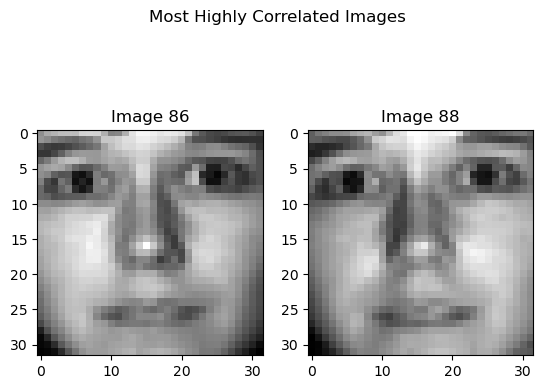

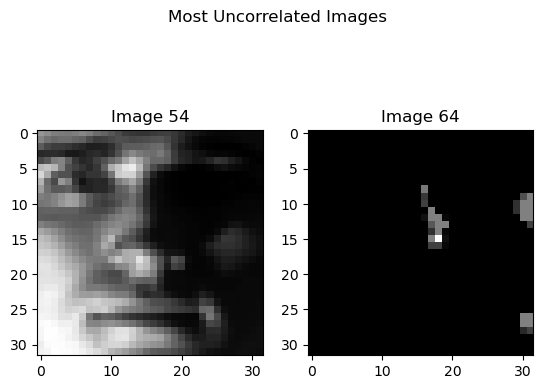

In [47]:
# Part (b)
# Find the most highly correlated and most uncorrelated images
np.fill_diagonal(C, 10)  # Set diagonal elements to 10 to remove its influence on overall data set
max_idx = np.unravel_index(np.argmax(C), C.shape)
min_idx = np.unravel_index(np.argmin(C), C.shape)

# Plot the most highly correlated images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X[:, max_idx[0]].reshape(32, 32), cmap='gray')
ax1.set_title(f"Image {max_idx[0]}")
ax2.imshow(X[:, max_idx[1]].reshape(32, 32), cmap='gray')
ax2.set_title(f"Image {max_idx[1]}")
plt.suptitle("Most Highly Correlated Images")
plt.show()

# Plot the most uncorrelated images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X[:, min_idx[0]].reshape(32, 32), cmap='gray')
ax1.set_title(f"Image {min_idx[0]}")
ax2.imshow(X[:, min_idx[1]].reshape(32, 32), cmap='gray')
ax2.set_title(f"Image {min_idx[1]}")
plt.suptitle("Most Uncorrelated Images")
plt.show()

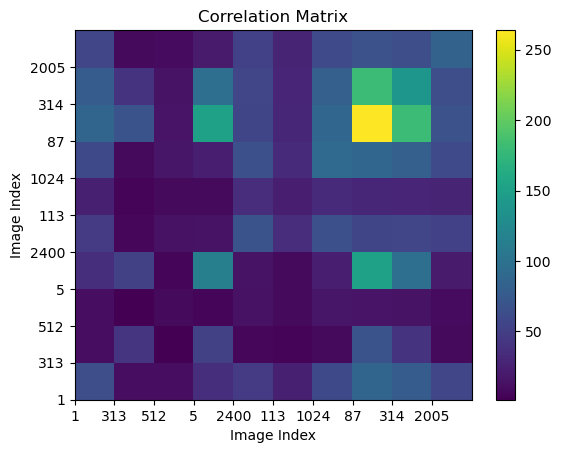

In [48]:
# Part (c)
# List of specified image indices
image_indices = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]

# Compute the 10x10 correlation matrix C
C = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        C[i, j] = np.dot(X[:, (image_indices[i] - 1)].T, X[:, (image_indices[j] - 1 )])

#print(C)

# Plot the correlation matrix using pcolor
plt.pcolor(C, cmap='viridis')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.xticks(range(10), [idx  for idx in image_indices])
plt.yticks(range(10), [idx  for idx in image_indices])
plt.show()

In [49]:
# Part (d)
# Compute the matrix Y
Y = np.dot(X, X.T)

# Compute the eigenvalues and eigenvectors of Y
eigenvalues, eigenvectors = np.linalg.eigh(Y)

#print(eigenvalues)
#print(eigenvectors)

# Sort the eigenvalues and eigenvectors by the eigenvalue magnitudes in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#print(eigenvalues)
#print(eigenvectors) 

# Select the first six eigenvectors
first_six_eigenvectors = eigenvectors[:, :6]

print("First six eigenvectors with the largest magnitude eigenvalue:")
print(first_six_eigenvectors)

First six eigenvectors with the largest magnitude eigenvalue:
[[-0.02384327  0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146  0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448  0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937 -0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902  -0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019  -0.02965746 -0.05241684  0.00040934  0.05757412  0.00941028]]


In [50]:
# Part (e)
U, S, Vt = np.linalg.svd(X, full_matrices=False)
principal_components = Vt[:6, :]

print("First six principal component directions:\n", principal_components)


First six principal component directions:
 [[-0.01219331 -0.00215188 -0.01056679 ... -0.02177117 -0.03015309
  -0.0257889 ]
 [-0.01938848 -0.00195186  0.02471869 ...  0.04027773  0.00219562
   0.01553129]
 [ 0.01691206  0.00143586  0.0384465  ...  0.01340245 -0.01883373
   0.00643709]
 [ 0.0204079  -0.01201431  0.00397553 ... -0.01641295 -0.04011563
   0.02679029]
 [-0.01902342  0.00418948  0.0384026  ... -0.01092512  0.00087341
   0.01260435]
 [-0.0090084  -0.00624237  0.01580824 ... -0.00977639  0.00090316
   0.00304479]]


In [51]:
# Part (f)
u1 = U[:, 0]
v1 = eigenvectors[:, 0]

# Compute the norm of the difference of the absolute values of v1 and u1
norm_diff = np.linalg.norm(np.abs(v1) - np.abs(u1))
print("Norm of difference of their absolute values:", norm_diff)

Norm of difference of their absolute values: 6.974796533878701e-16


Percentage of variance captured by each of the first 6 SVD modes:
Mode 1: 72.93%
Mode 2: 15.28%
Mode 3: 2.57%
Mode 4: 1.88%
Mode 5: 0.64%
Mode 6: 0.59%


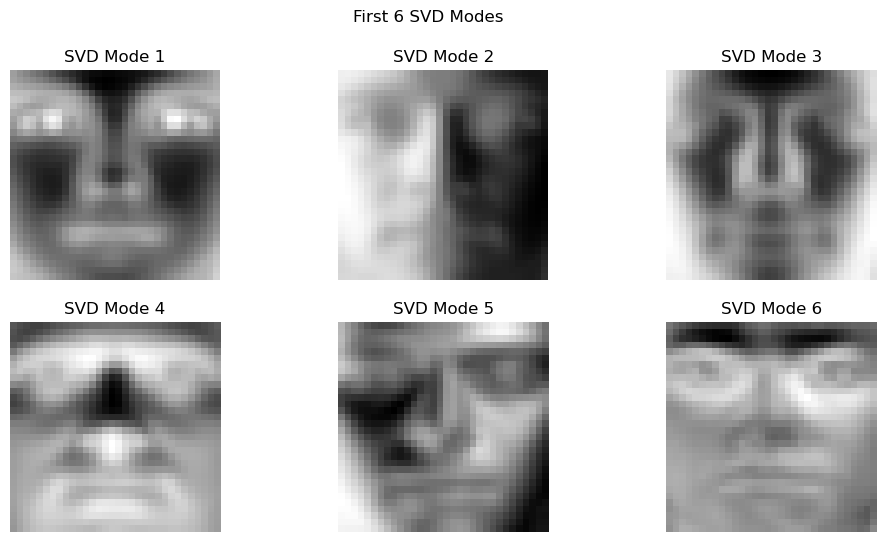

In [52]:
# Part (g): Compute the percentage of variance captured by each of the first 6 SVD modes
total_variance = np.sum(S ** 2)
percentage_variance = (S[:6] ** 2) / total_variance * 100
print("Percentage of variance captured by each of the first 6 SVD modes:")
for i, percentage in enumerate(percentage_variance):
    print(f"Mode {i + 1}: {percentage:.2f}%")

# Plot the first 6 SVD modes
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for i in range(6):
    ax = axes[i // 3, i % 3]
    ax.imshow(U[:, i].reshape(32, 32), cmap='gray')
    ax.set_title(f"SVD Mode {i + 1}")
    ax.axis('off')
plt.suptitle("First 6 SVD Modes")
plt.show()